In [104]:
d = 2
c = 0.15
k = 1.2
b = 0

pricefactor = 0.45

qCournot = (d*(1+2*c))/(4*(c**2)+8*c+3)
qComp = d / (2 * (1+c))
qLeader = d * (1+2*c) / (2 * (1 + 4*c + c**2))
qFollower = (d - qLeader) / (2 * (1+c))
qCartel = d / (4 + 2*c)

qfolltest = (d * (1+6*c+2*(c**2)))/(4*(1+c)*(1+4*c+c**2))
print(qfolltest)
print("Cournot | Comp. | Follower | Leader | Bowley | Cartel")
print("Quantities:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (qCournot, qComp, qFollower, qLeader, qLeader, qCartel))
#print(qCournot, qComp, qFollower, qLeader, qLeader, qCartel)

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

print("Profits:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (profit(qCournot, qCournot), profit(qComp, qComp),  profit(qFollower, qLeader), profit(qLeader, qFollower), profit(qLeader, qLeader), profit(qCartel, qCartel)))
#print(profit(qCournot, qCournot), profit(qComp, qComp), profit(qFollower, qLeader), profit(qLeader, qFollower), profit(qLeader, qLeader), profit(qCartel, qCartel))


0.521203188852415
Cournot | Comp. | Follower | Leader | Bowley | Cartel
Quantities:
 0.606  |  0.870  |  0.521  |  0.801  |  0.801  |  0.465
Profits:
 0.507  |  0.136  |  0.375  |  0.536  |  0.267  |  0.558


In [105]:
profit(qCournot, qLeader)

0.3649437362842603

In [106]:
def price(q1, q2):
    return d - q1 - q2


print("Prices:")
print(price(qCournot, qCournot), price(qComp, qComp), price(qFollower, qLeader), price(qLeader, qFollower), price(qLeader, qLeader), price(qCartel, qCartel))

Prices:
0.787878787878788 0.26086956521739113 0.6775641455081396 0.6775641455081396 0.39753466872110943 1.0697674418604652


In [107]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j)] = profit(incr/1000, j/1000)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, j/1000)

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.869, 0.001] 1.04243502
Min Profit:  [0.999, 0.999] -0.17724258000000012


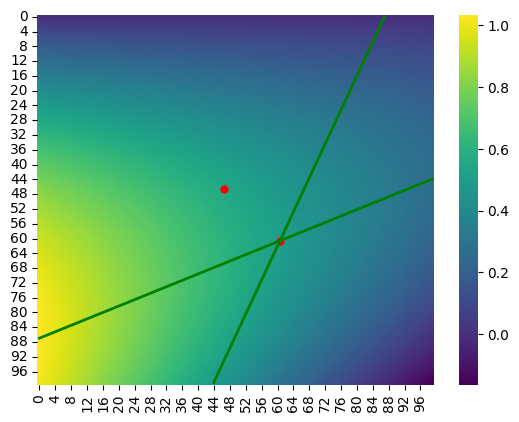

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(valDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
cour_i, cour_j = qCournot, qCournot
car_i, car_j = qCartel, qCartel  

xaxis = []
reacVal = []
for i in range(0, 100):
    xaxis.append(i+0.5)
    reacVal.append(((d - (i/100)) / (2 * (1+c)))*100 + 0.5)

plt.plot(reacVal, xaxis, color='green', linestyle='-', linewidth=2) 
plt.plot(xaxis, reacVal, color='green', linestyle='-', linewidth=2) # Adjust coordinates for the center of the cell

plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='red', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)   
plt.show()


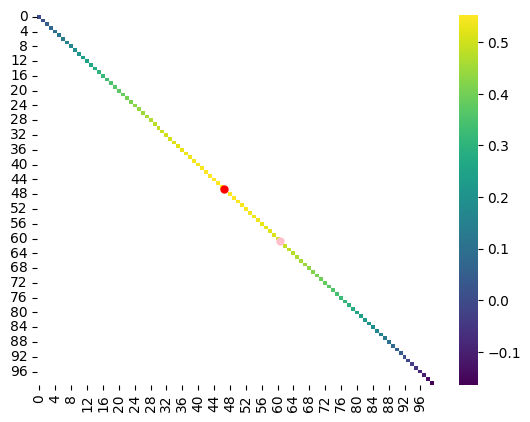

In [109]:
testValDat = valDat
for i in range(0, 100):
    for j in range(0, 100):
        if testValDat[i, j] != testValDat[j, i]:
            testValDat[i, j] = testValDat[j, i] = None

sns.heatmap(testValDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='pink', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)  
plt.show()

In [110]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j)] = price(i/1000, j/1000)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.001] Raw:  1.9980000000000002 Discounted:  0.8991000000000001
Min Price:  [0.999, 0.999] Raw:  0.0019999999999998908 Discounted:  0.0008999999999999509


0.49149338374291124
[0, 0, 0.49149338374291124, 0.49149338374291124, 0.8631329933783829, 0.8631329933783829, 1.1441459307208945, 1.1441459307208945, 1.3566320837209034, 1.3566320837209034, 1.517302142700116, 1.517302142700116, 1.638791790321449, 1.638791790321449, 1.730655418012438, 1.730655418012438, 1.800117518345889, 1.800117518345889, 1.8526408456301622, 1.8526408456301622, 1.8923560269415218, 1.8923560269415218, 1.92238640978565, 1.92238640978565, 1.9450936935997356, 1.9450936935997356, 1.9622636624572674, 1.9622636624572674, 1.9752466256765728, 1.9752466256765728, 1.9850636110975979, 1.9850636110975979, 1.9924866624556508, 1.9924866624556508, 1.9980995557320613, 1.9980995557320613, 2.002343709438232, 2.002343709438232, 2.005552899386187, 2.005552899386187, 2.007979508042486, 2.007979508042486, 2.009814372810954, 2.009814372810954, 2.011201794185977, 2.011201794185977, 2.012250884072573, 2.012250884072573, 2.0130441467467475, 2.0130441467467475, 2.0136439672943274, 2.0136439672943

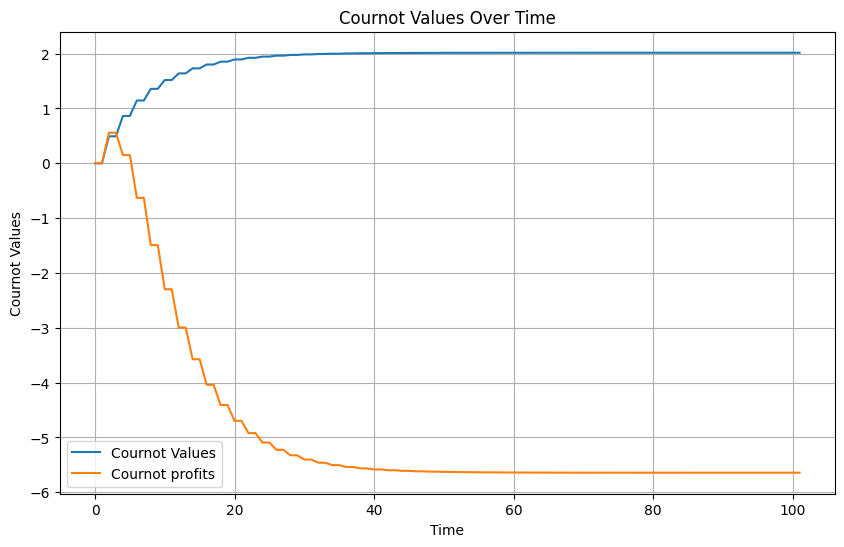

In [111]:
pastCournotValues = [0, 0]
profitsCournot = [0, 0]
const = ((1 +2*c)*d)/(4*(1+c)**2)
discount = (1/(1+c)**2)
print(const)
for i in range(0, 100):
    pastCournotValues.append((const + (pastCournotValues[i] * discount)))
    profitsCournot.append(profit(pastCournotValues[i+2], pastCournotValues[i+2]))

print(pastCournotValues)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastCournotValues)), pastCournotValues, label='Cournot Values')
plt.plot(range(len(profitsCournot)), profitsCournot, label='Cournot profits')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()


[0, 0.8695652173913044, 0.4914933837429111, 0.6558724418509082, 0.5844032861517791, 0.6154768321079221, 0.601966594735686, 0.6078406109844844, 0.6052866908763113, 0.6063970909233429, 0.6059143082941988, 0.6061242137851309, 0.606032950528204, 0.6060726302051287, 0.6060553781716832, 0.6060628790557899, 0.6060596178018305, 0.6060610357383346, 0.6060604192442024, 0.6060606872851295, 0.6060605707455959, 0.6060606214149583, 0.6060605993848007, 0.6060606089631302, 0.6060606047986391, 0.6060606066092874, 0.6060606058220489, 0.6060606061643267, 0.6060606060155103, 0.606060606080213, 0.6060606060520813, 0.6060606060643126, 0.6060606060589946, 0.6060606060613067, 0.6060606060603014, 0.6060606060607386, 0.6060606060605485, 0.6060606060606312, 0.6060606060605952, 0.6060606060606107, 0.6060606060606041, 0.606060606060607, 0.6060606060606057, 0.6060606060606063, 0.606060606060606, 0.6060606060606062, 0.6060606060606061, 0.6060606060606062, 0.6060606060606061, 0.6060606060606062, 0.6060606060606061, 0

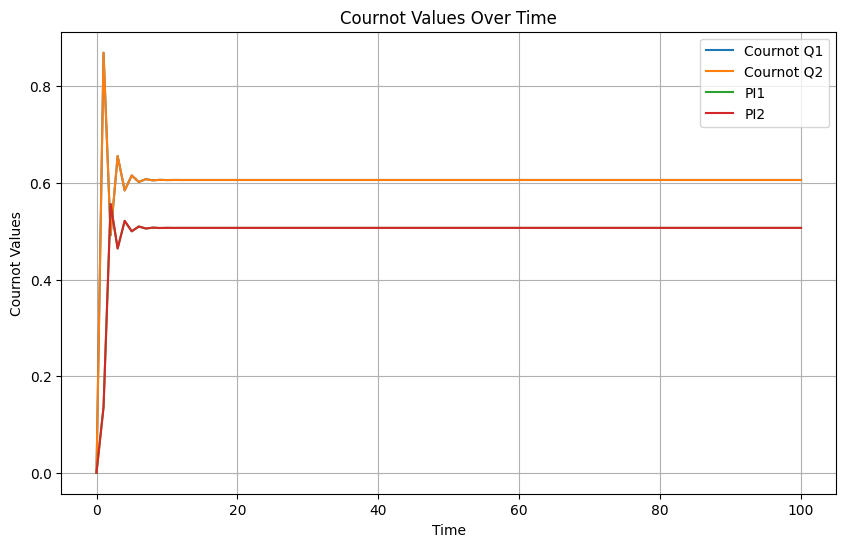

In [112]:
pastInteractiveCournotValues1 = [0]
pastInteractiveCournotValues2 = [0]
profitsInteractiveCournot1 = [0]
profitsInteractiveCournot2 = [0]
for i in range(0, 100):
    pastInteractiveCournotValues1.append((d-pastInteractiveCournotValues2[i]) / (2 *(1+c)))
    pastInteractiveCournotValues2.append((d-pastInteractiveCournotValues1[i]) / (2 *(1+c)))
    profitsInteractiveCournot1.append(profit(pastInteractiveCournotValues1[i+1], pastInteractiveCournotValues2[i+1]))
    profitsInteractiveCournot2.append(profit(pastInteractiveCournotValues2[i+1], pastInteractiveCournotValues1[i+1]))

print(pastInteractiveCournotValues1)
print(profitsInteractiveCournot1)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastInteractiveCournotValues1)), pastInteractiveCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastInteractiveCournotValues2)), pastInteractiveCournotValues2, label='Cournot Q2')
plt.plot(range(len(profitsInteractiveCournot1)), profitsInteractiveCournot1, label='PI1')
plt.plot(range(len(profitsInteractiveCournot2)), profitsInteractiveCournot2, label='PI2')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

[0, 0.5263157894736842, 0.11080332409972304, 0.4388394809739029, 0.17986356765218192, 0.384318236064067, 0.22290665573889454, 0.3503368507324517, 0.24973406521122243, 0.3291573169385087, 0.2664547497853879, 0.31595677648522, 0.27687622909061577, 0.30772929282319816, 0.283371610929054, 0.3026013597928521, 0.2874199791109063, 0.2994052796492846, 0.28994320027688064, 0.2974132629393047, 0.29151584504791733, 0.29617170127796, 0.2924960253068738, 0.2953978747577312, 0.2931069409807385, 0.2949155729099433, 0.2934877055974132, 0.2946149692652001, 0.2937250242643158, 0.2944276124229087, 0.29387293756086164, 0.2943108387677407, 0.2939651272886258, 0.2942380574037164, 0.2940225862602239, 0.29419269505771795, 0.2940583986386438, 0.29416442212738647, 0.294080719373116, 0.29414680049490854, 0.2940946311882301, 0.29413581748297635, 0.29410330198712403, 0.29412897211542843, 0.29410870622466184, 0.294124705612109, 0.29411207451675603, 0.29412204643413997, 0.2941141738677843, 0.2941203890517492, 0.2941

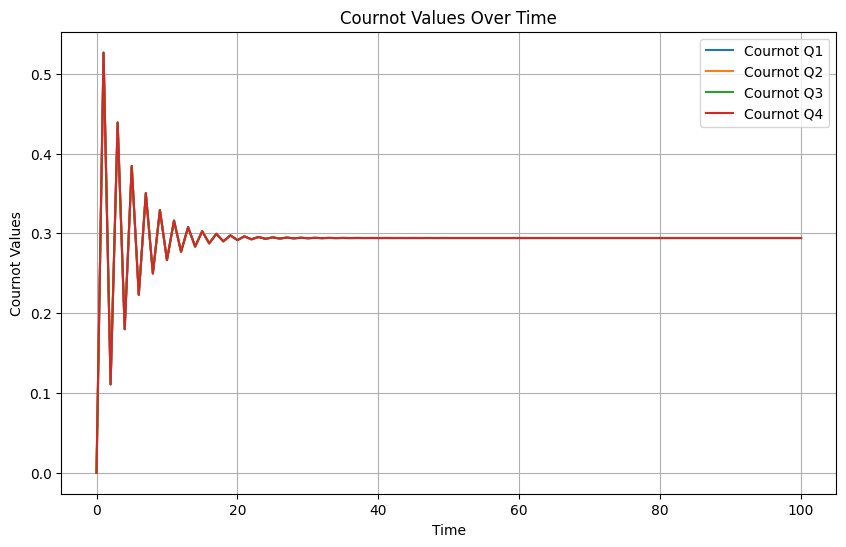

In [113]:
c = 0.9
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))

print(pastItCournotValues1)
print(pastItCournotValues2)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastItCournotValues1)), pastItCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastItCournotValues2)), pastItCournotValues2, label='Cournot Q2')
plt.plot(range(len(pastItCournotValues3)), pastItCournotValues3, label='Cournot Q3')
plt.plot(range(len(pastItCournotValues4)), pastItCournotValues4, label='Cournot Q4')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

In [114]:
# In a 4 oligopoly

q_comp4 = (c * d) / (2 + c)
q_cournot4 = d / (5 + 2 * c)

Q_comp4 = 4 * q_comp4
p_comp4 = price(q_comp4*2, q_comp4*2)
profit_comp4 = profit(q_comp4, 3*q_comp4)

print("Comp : ", q_comp4, Q_comp4, p_comp4, profit_comp4, profit_comp4*4)

Q_cournot4 = 4 * q_cournot4
p_cournot4 = price(q_cournot4*2, q_cournot4*2)
profit_cournot4 = profit(q_cournot4, 3*q_cournot4)
print("Cournot : ", q_cournot4, Q_cournot4, p_cournot4, profit_cournot4, profit_cournot4*4)

q_cartel4 = d / (2 * (4+c))
p_cartel4 = price(q_cartel4, q_cartel4*3)
profit_cartel4 = profit(q_cartel4, 3*q_cartel4)
print("Cartel : ", q_cartel4, 4*q_cartel4, p_cartel4, profit_cartel4, profit_cartel4*4)




Comp :  0.6206896551724138 2.4827586206896552 -0.48275862068965525 -0.7756480380499406 -3.1025921521997626
Cournot :  0.29411764705882354 1.1764705882352942 0.8235294117647057 0.19723183391003454 0.7889273356401382
Cartel :  0.2040816326530612 0.8163265306122448 1.183673469387755 0.24489795918367344 0.9795918367346937


In [115]:
profit(0.3795657, 1.746137-0.3795657)+ profit(0.4869857, 1.746137-0.4869857)+profit(0.401197, 1.746137-0.401197)+profit(0.4783882, 1.746137-0.4783882)

-0.30078728413259775

In [116]:
def computeCournotStackelbergQuantities(D, C):
    qCt = (D*(1+2*C))/(4*(C**2)+8*C+3)
    qLr = D * (1+2*C)/ (2 * (1 + 4*C + C**2))
    qFr = (D - qLr) / (2 * (1+C))
    return qCt, qLr, qFr

profits_diff = {}
for C in range(20, 200):
    for D in range(0, 300):
       q1 = computeCournotStackelbergQuantities(D/100, C/100)[0]
       q2 = computeCournotStackelbergQuantities(D/100, C/100)[1]
       p1 = profit(q1, q1)
       p2 = profit(q2,computeCournotStackelbergQuantities(D/100, C/100)[2])
       if p1 > 0 and p1 <1 and p2 > 0 and p2 < 1 and q1 < 1 and q2<1 and q1 >0 and q2 >0:
            profits_diff[(D, C)] = p2-p1

print(profits_diff)
maxdiff = max(profits_diff, key = lambda k: profits_diff[k])

print ("Max Price: ", [x/100 for x in maxdiff], "Raw: ", profits_diff[maxdiff])


{(1, 20): 0.00205693126925517, (2, 20): 0.004084502570626824, (3, 20): 0.0060827139041149635, (4, 20): 0.00805156526971958, (5, 20): 0.009991056667440684, (6, 20): 0.011901188097278269, (7, 20): 0.013781959559232317, (8, 20): 0.015633371053302876, (9, 20): 0.017455422579489913, (10, 20): 0.019248114137793426, (11, 20): 0.021011445728213438, (12, 20): 0.02274541735074992, (13, 20): 0.024450029005402857, (14, 20): 0.026125280692172334, (15, 20): 0.02777117241105828, (16, 20): 0.029387704162060657, (17, 20): 0.030974875945179572, (18, 20): 0.032532687760414944, (19, 20): 0.0340611396077668, (20, 20): 0.03556023148723514, (21, 20): 0.037029963398820004, (22, 20): 0.038470335342521256, (23, 20): 0.03988134731833906, (24, 20): 0.041262999326273364, (25, 20): 0.04261529136632411, (26, 20): 0.04393822343849135, (27, 20): 0.04523179554277504, (28, 20): 0.04649600767917525, (29, 20): 0.04773085984769193, (30, 20): 0.04893635204832508, (31, 20): 0.050112484281074815, (32, 20): 0.05125925654594096